In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import re
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Helper function to read input from file if too large to paste inline
def read_input(fname):
    with open(fname, 'r') as f:
        data_str = f.read()
    return data_str

# Day 1: Chronal Calibration 
"We've detected some temporal anomalies," one of Santa's Elves at the Temporal Anomaly Research and Detection Instrument Station tells you. She sounded pretty worried when she called you down here. "At 500-year intervals into the past, someone has been changing Santa's history!"

"The good news is that the changes won't propagate to our time stream for another 25 days, and we have a device" - she attaches something to your wrist - "that will let you fix the changes with no such propagation delay. It's configured to send you 500 years further into the past every few days; that was the best we could do on such short notice."

"The bad news is that we are detecting roughly fifty anomalies throughout time; the device will indicate fixed anomalies with stars. The other bad news is that we only have one device and you're the best person for the job! Good lu--" She taps a button on the device and you suddenly feel like you're falling. To save Christmas, you need to get all fifty stars by December 25th.

Collect stars by solving puzzles. Two puzzles will be made available on each day in the advent calendar; the second puzzle is unlocked when you complete the first. Each puzzle grants one star. Good luck!

After feeling like you've been falling for a few minutes, you look at the device's tiny screen. "Error: Device must be calibrated before first use. Frequency drift detected. Cannot maintain destination lock." Below the message, the device shows a sequence of changes in frequency (your puzzle input). A value like +6 means the current frequency increases by 6; a value like -3 means the current frequency decreases by 3.

For example, if the device displays frequency changes of +1, -2, +3, +1, then starting from a frequency of zero, the following changes would occur:

    Current frequency  0, change of +1; resulting frequency  1.
    Current frequency  1, change of -2; resulting frequency -1.
    Current frequency -1, change of +3; resulting frequency  2.
    Current frequency  2, change of +1; resulting frequency  3.
    In this example, the resulting frequency is 3.

Here are other example situations:

    +1, +1, +1 results in  3
    +1, +1, -2 results in  0
    -1, -2, -3 results in -6

Starting with a frequency of zero, what is the resulting frequency after all of the changes in frequency have been applied?

Your puzzle answer was 402.

In [3]:
day1_input = read_input('day_01.txt')

In [4]:
day1_freq_changes = map(int, day1_input.split())

In [5]:
# Part 1 - total frequency change
sum(day1_freq_changes)

402

## Day 1 Part Two 
You notice that the device repeats the same frequency change list over and over. To calibrate the device, you need to find the first frequency it reaches twice.

For example, using the same list of changes above, the device would loop as follows:

    Current frequency  0, change of +1; resulting frequency  1.
    Current frequency  1, change of -2; resulting frequency -1.
    Current frequency -1, change of +3; resulting frequency  2.
    Current frequency  2, change of +1; resulting frequency  3.
    (At this point, the device continues from the start of the list.)
    Current frequency  3, change of +1; resulting frequency  4.
    Current frequency  4, change of -2; resulting frequency  2, which has already been seen.
In this example, the first frequency reached twice is 2. Note that your device might need to repeat its list of frequency changes many times before a duplicate frequency is found, and that duplicates might be found while in the middle of processing the list.

Here are other examples:

    +1, -1 first reaches 0 twice.
    +3, +3, +4, -2, -4 first reaches 10 twice.
    -6, +3, +8, +5, -6 first reaches 5 twice.
    +7, +7, -2, -7, -4 first reaches 14 twice.
What is the first frequency your device reaches twice?

Your puzzle answer was 481.

In [6]:
def first_freq_seen_twice(changes):
    # Keep looping through input and tracking what how many times we've seen current frequency
    i = 0
    loop_count = 0 
    N = len(changes)
    seen_twice = None
    current_freq = 0
    freq_seen = defaultdict(int)
    freq_seen[0] = 1
    while seen_twice is None:
        if i % N == 0:
            loop_count += 1
        this_change = changes[i % N]
        current_freq += this_change
        freq_seen[current_freq] += 1
        if freq_seen[current_freq] > 1:
            seen_twice = current_freq
        i += 1
    return seen_twice, loop_count

In [7]:
# first frequency seen twice and number of loop iterations required
first_freq_seen_twice(day1_freq_changes)

(481, 142)

Feels like there should be a smarter way to do this e.g. use cumsum input list somehow.
We see from the naive solution that it takes 142 loops to see a frequency again.

The plot below shows that the frequency changes are usually small with a few large jumps, and from part 1 we know that each loop has a net offset of +402. So we're interested in number of loops required before second or third regions in plot below start to ovelap either with first region or each other.

I don't have a solution for this yet, one to ponder.

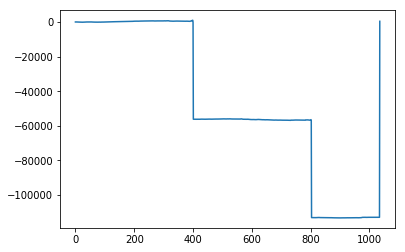

In [8]:
_ = plt.plot(np.cumsum(day1_freq_changes))
_ = plt.show()

# Day 2: Inventory Management System 
You stop falling through time, catch your breath, and check the screen on the device. "Destination reached. Current Year: 1518. Current Location: North Pole Utility Closet 83N10." You made it! Now, to find those anomalies.

Outside the utility closet, you hear footsteps and a voice. "...I'm not sure either. But now that so many people have chimneys, maybe he could sneak in that way?" Another voice responds, "Actually, we've been working on a new kind of suit that would let him fit through tight spaces like that. But, I heard that a few days ago, they lost the prototype fabric, the design plans, everything! Nobody on the team can even seem to remember important details of the project!"

"Wouldn't they have had enough fabric to fill several boxes in the warehouse? They'd be stored together, so the box IDs should be similar. Too bad it would take forever to search the warehouse for two similar box IDs..." They walk too far away to hear any more.

Late at night, you sneak to the warehouse - who knows what kinds of paradoxes you could cause if you were discovered - and use your fancy wrist device to quickly scan every box and produce a list of the likely candidates (your puzzle input).

To make sure you didn't miss any, you scan the likely candidate boxes again, counting the number that have an ID containing exactly two of any letter and then separately counting those with exactly three of any letter. You can multiply those two counts together to get a rudimentary checksum and compare it to what your device predicts.

For example, if you see the following box IDs:

    abcdef contains no letters that appear exactly two or three times.
    bababc contains two a and three b, so it counts for both.
    abbcde contains two b, but no letter appears exactly three times.
    abcccd contains three c, but no letter appears exactly two times.
    aabcdd contains two a and two d, but it only counts once.
    abcdee contains two e.
    ababab contains three a and three b, but it only counts once.
Of these box IDs, four of them contain a letter which appears exactly twice, and three of them contain a letter which appears exactly three times. Multiplying these together produces a checksum of 4 * 3 = 12.

What is the checksum for your list of box IDs?

Your puzzle answer was 6225.

In [9]:
box_ids = read_input('day_02.txt').split('\n')

In [10]:
len(box_ids)

250

In [11]:
def count_letters(box_id):
    res = defaultdict(int)
    for letter in box_id:
        res[letter] += 1
    count_2 = 1 if 2 in res.values() else 0
    count_3 = 1 if 3 in res.values() else 0
    return count_2, count_3

In [12]:
# checksum = 
np.prod(np.array([sum(lst) for lst in zip(*[count_letters(box_id) for box_id in box_ids])]))

6225

# Part Two
Confident that your list of box IDs is complete, you're ready to find the boxes full of prototype fabric.

The boxes will have IDs which differ by exactly one character at the same position in both strings. For example, given the following box IDs:

    abcde
    fghij
    klmno
    pqrst
    fguij
    axcye
    wvxyz
The IDs abcde and axcye are close, but they differ by two characters (the second and fourth). However, the IDs fghij and fguij differ by exactly one character, the third (h and u). Those must be the correct boxes.

What letters are common between the two correct box IDs? (In the example above, this is found by removing the differing character from either ID, producing fgij.)

Your puzzle answer was revtaubfniyhsgxdoajwkqilp.

In [13]:
box_ids_ints = np.array([[ord(c) for c in box_id] for box_id in box_ids])

In [14]:
def find_diff_1_boxes(box_ids):
    X = np.array([[ord(c) for c in box_id] for box_id in box_ids])
    res = []
    n_boxes = len(box_ids)
    for i in range(n_boxes):
        for j in range(i, n_boxes):
            char_diff = np.not_equal(X[i, :] - X[j, :], 0)
            n_char_diff = char_diff.sum()
            if n_char_diff == 1:
                res.append((i, j, int(np.nonzero(char_diff)[0])))
    return res

In [15]:
[(box_ids[i], box_ids[j], box_ids[i][:ind] + box_ids[i][ind+1:]) for (i, j, ind) in find_diff_1_boxes(box_ids)]

[('revtaubfniyhusgxdoajwkqilp',
  'revtaubfniyhpsgxdoajwkqilp',
  'revtaubfniyhsgxdoajwkqilp')]

# Day 3: No Matter How You Slice It 
The Elves managed to locate the chimney-squeeze prototype fabric for Santa's suit (thanks to someone who helpfully wrote its box IDs on the wall of the warehouse in the middle of the night). Unfortunately, anomalies are still affecting them - nobody can even agree on how to cut the fabric.

The whole piece of fabric they're working on is a very large square - at least 1000 inches on each side.

Each Elf has made a claim about which area of fabric would be ideal for Santa's suit. All claims have an ID and consist of a single rectangle with edges parallel to the edges of the fabric. Each claim's rectangle is defined as follows:

* The number of inches between the left edge of the fabric and the left edge of the rectangle.
* The number of inches between the top edge of the fabric and the top edge of the rectangle.
* The width of the rectangle in inches.
* The height of the rectangle in inches.

A claim like `#123 @ 3,2: 5x4` means that claim ID 123 specifies a rectangle 3 inches from the left edge, 2 inches from the top edge, 5 inches wide, and 4 inches tall. Visually, it claims the square inches of fabric represented by # (and ignores the square inches of fabric represented by .) in the diagram below:

    ...........
    ...........
    ...#####...
    ...#####...
    ...#####...
    ...#####...
    ...........
    ...........
    ...........
The problem is that many of the claims overlap, causing two or more claims to cover part of the same areas. For example, consider the following claims:

    #1 @ 1,3: 4x4
    #2 @ 3,1: 4x4
    #3 @ 5,5: 2x2
Visually, these claim the following areas:

    ........
    ...2222.
    ...2222.
    .11XX22.
    .11XX22.
    .111133.
    .111133.
    ........
The four square inches marked with X are claimed by both 1 and 2. (Claim 3, while adjacent to the others, does not overlap either of them.)

If the Elves all proceed with their own plans, none of them will have enough fabric. How many square inches of fabric are within two or more claims?

Your puzzle answer was 116920.

In [16]:
def parse_day_03():
    lines = [line.split() for line in read_input('day_03.txt').split('\n')]
    def parse_rec(rec):
        id = int(rec[0].lstrip('#'))
        x0, y0 = map(int, rec[2].rstrip(':').split(','))
        w, h = map(int, rec[3].split('x'))
        return {'id': id, 'x0': x0, 'y0': y0, 'w': w, 'h': h}
    recs = map(parse_rec, lines)
    return recs

In [17]:
claims = parse_day_03()

In [18]:
def find_overlap(claims):
    X = np.zeros((1000, 1000))
    claim_ok = []
    # Part 1: label all the squares claimed
    for claim in claims:
        X[claim['y0']:claim['y0']+claim['h'], claim['x0']:claim['x0']+claim['w']] += 1
    n_overlap = (X > 1).sum()
    
    # Part 2: check whether a claim is the only one for a given region
    for claim in claims:
        all_ok = (X[claim['y0']:claim['y0']+claim['h'], claim['x0']:claim['x0']+claim['w']] == 1).all()
        if all_ok:
            claim_ok.append(claim['id'])
            
    return n_overlap, claim_ok

In [19]:
find_overlap(claims)

(116920, [382])

# Part Two 
Amidst the chaos, you notice that exactly one claim doesn't overlap by even a single square inch of fabric with any other claim. If you can somehow draw attention to it, maybe the Elves will be able to make Santa's suit after all!

For example, in the claims above, only claim 3 is intact after all claims are made.

What is the ID of the only claim that doesn't overlap?

Your puzzle answer was 382.

# Day 4: Repose Record 
You've sneaked into another supply closet - this time, it's across from the prototype suit manufacturing lab. You need to sneak inside and fix the issues with the suit, but there's a guard stationed outside the lab, so this is as close as you can safely get.

As you search the closet for anything that might help, you discover that you're not the first person to want to sneak in. Covering the walls, someone has spent an hour starting every midnight for the past few months secretly observing this guard post! They've been writing down the ID of the one guard on duty that night - the Elves seem to have decided that one guard was enough for the overnight shift - as well as when they fall asleep or wake up while at their post (your puzzle input).

For example, consider the following records, which have already been organized into chronological order:

    [1518-11-01 00:00] Guard #10 begins shift
    [1518-11-01 00:05] falls asleep
    [1518-11-01 00:25] wakes up
    [1518-11-01 00:30] falls asleep
    [1518-11-01 00:55] wakes up
    [1518-11-01 23:58] Guard #99 begins shift
    [1518-11-02 00:40] falls asleep
    [1518-11-02 00:50] wakes up
    [1518-11-03 00:05] Guard #10 begins shift
    [1518-11-03 00:24] falls asleep
    [1518-11-03 00:29] wakes up
    [1518-11-04 00:02] Guard #99 begins shift
    [1518-11-04 00:36] falls asleep
    [1518-11-04 00:46] wakes up
    [1518-11-05 00:03] Guard #99 begins shift
    [1518-11-05 00:45] falls asleep
    [1518-11-05 00:55] wakes up
Timestamps are written using year-month-day hour:minute format. The guard falling asleep or waking up is always the one whose shift most recently started. Because all asleep/awake times are during the midnight hour (00:00 - 00:59), only the minute portion (00 - 59) is relevant for those events.

Visually, these records show that the guards are asleep at these times:

    Date   ID   Minute
                000000000011111111112222222222333333333344444444445555555555
                012345678901234567890123456789012345678901234567890123456789
    11-01  #10  .....####################.....#########################.....
    11-02  #99  ........................................##########..........
    11-03  #10  ........................#####...............................
    11-04  #99  ....................................##########..............
    11-05  #99  .............................................##########.....
The columns are Date, which shows the month-day portion of the relevant day; ID, which shows the guard on duty that day; and Minute, which shows the minutes during which the guard was asleep within the midnight hour. (The Minute column's header shows the minute's ten's digit in the first row and the one's digit in the second row.) Awake is shown as ., and asleep is shown as #.

Note that guards count as asleep on the minute they fall asleep, and they count as awake on the minute they wake up. For example, because Guard #10 wakes up at 00:25 on 1518-11-01, minute 25 is marked as awake.

If you can figure out the guard most likely to be asleep at a specific time, you might be able to trick that guard into working tonight so you can have the best chance of sneaking in. You have two strategies for choosing the best guard/minute combination.

__Strategy 1__: Find the guard that has the most minutes asleep. What minute does that guard spend asleep the most?

In the example above, Guard #10 spent the most minutes asleep, a total of 50 minutes (20+25+5), while Guard #99 only slept for a total of 30 minutes (10+10+10). Guard #10 was asleep most during minute 24 (on two days, whereas any other minute the guard was asleep was only seen on one day).

While this example listed the entries in chronological order, your entries are in the order you found them. You'll need to organize them before they can be analyzed.

What is the ID of the guard you chose multiplied by the minute you chose? (In the above example, the answer would be 10 * 24 = 240.)

Your puzzle answer was 146622.

In [20]:
events = sorted(read_input('day_04.txt').split('\n'))

In [21]:
def parse_sleep_events(events):
    res = []
    rec = None
    for event in events:
        if 'Guard' in event:
            # Start new record
            if rec is not None:
                res.append(rec)
            rec = {
                'guard_id': int(re.findall('#(\d+)', event)[0]),
                'sleep': [],
                'wake': []
            }
        if 'asleep' in event:
            rec['sleep'].append(int(re.findall(' 00:(\d{2})', event)[0]))
        if 'wakes' in event:
            rec['wake'].append(int(re.findall(' 00:(\d{2})', event)[0]))
    guard_sleeps = defaultdict(list)
    for rec in res:
        shift = np.zeros(60, dtype=np.int32)
        for sleep in rec['sleep']:
            shift[sleep] = 1
        for wake in rec['wake']:
            shift[wake] = -1
        shift = np.cumsum(shift)
        guard_sleeps[rec['guard_id']].append(shift)
    for guard_id in guard_sleeps.keys():
        guard_sleeps[guard_id] = np.array(guard_sleeps[guard_id])
    return guard_sleeps

In [22]:
guard_sleeps = parse_sleep_events(events)

In [23]:
def find_sleepiest(guard_sleeps):
    total_sleep = {k: v.sum() for k, v in guard_sleeps.iteritems()}
    sleepiest = None
    max_sleep = 0
    for guard, sleep in total_sleep.iteritems():
        if sleep > max_sleep:
            sleepiest = guard
            max_sleep = sleep
    most_often_asleep = np.argmax(np.sum(guard_sleeps[sleepiest], axis=0))
    return sleepiest, max_sleep, most_often_asleep, sleepiest*most_often_asleep

In [24]:
find_sleepiest(guard_sleeps)

(3491, 529, 42, 146622)

# Part Two 
Strategy 2: Of all guards, which guard is most frequently asleep on the same minute?

In the example above, Guard #99 spent minute 45 asleep more than any other guard or minute - three times in total. (In all other cases, any guard spent any minute asleep at most twice.)

What is the ID of the guard you chose multiplied by the minute you chose? (In the above example, the answer would be 99 * 45 = 4455.)

Your puzzle answer was 31848.

In [25]:
def find_most_often_asleep(guard_sleeps):
    often_asleep = {k: np.sum(v, axis=0) for k, v in guard_sleeps.iteritems()}
    most_sleeps = 0
    sleep_time = None
    sleep_guard = None
    for guard, sleep in often_asleep.iteritems():
        if np.max(sleep) > most_sleeps:
            most_sleeps = np.max(sleep)
            sleep_time = np.argmax(sleep)
            sleep_guard = guard
    return sleep_guard, most_sleeps, sleep_time, sleep_guard * sleep_time

In [26]:
find_most_often_asleep(guard_sleeps)

(1327, 17, 24, 31848)

# Day 5: Alchemical Reduction 
You've managed to sneak in to the prototype suit manufacturing lab. The Elves are making decent progress, but are still struggling with the suit's size reduction capabilities.

While the very latest in 1518 alchemical technology might have solved their problem eventually, you can do better. You scan the chemical composition of the suit's material and discover that it is formed by extremely long polymers (one of which is available as your puzzle input).

The polymer is formed by smaller units which, when triggered, react with each other such that two adjacent units of the same type and opposite polarity are destroyed. Units' types are represented by letters; units' polarity is represented by capitalization. For instance, r and R are units with the same type but opposite polarity, whereas r and s are entirely different types and do not react.

For example:

- In aA, a and A react, leaving nothing behind.
- In abBA, bB destroys itself, leaving aA. As above, this then destroys itself, leaving nothing.
- In abAB, no two adjacent units are of the same type, and so nothing happens.
- In aabAAB, even though aa and AA are of the same type, their polarities match, and so nothing happens.

Now, consider a larger example, dabAcCaCBAcCcaDA:

    dabAcCaCBAcCcaDA  The first 'cC' is removed.
    dabAaCBAcCcaDA    This creates 'Aa', which is removed.
    dabCBAcCcaDA      Either 'cC' or 'Cc' are removed (the result is the same).
    dabCBAcaDA        No further actions can be taken.
After all possible reactions, the resulting polymer contains 10 units.

How many units remain after fully reacting the polymer you scanned? 

Your puzzle answer was 11814.

In [27]:
polymer = read_input('day_05.txt')

In [28]:
def reduce_polymer(polymer, remove_unit=None):
    lower_letters = [chr(x) for x in range(ord('a'), ord('z') + 1)]
    upper_letters = [chr(x) for x in range(ord('A'), ord('Z') + 1)]
    lower_upper = [low + upp for low, upp in zip(lower_letters, upper_letters)]
    upper_lower = [upp + low for low, upp in zip(lower_letters, upper_letters)]
    if remove_unit is not None:
        polymer = polymer.replace(remove_unit.lower(), '').replace(remove_unit.upper(), '')
    n_poly = len(polymer)
    n_poly_new = n_poly
    done = False
    while not done:
        for lu in lower_upper:
            polymer = polymer.replace(lu, '')
        for ul in upper_lower:
            polymer = polymer.replace(ul, '')
        n_poly_new = len(polymer)
        done = n_poly_new == n_poly
        n_poly = n_poly_new
        
    return polymer

In [29]:
len(reduce_polymer(polymer))

11814

# Part Two 
Time to improve the polymer.

One of the unit types is causing problems; it's preventing the polymer from collapsing as much as it should. Your goal is to figure out which unit type is causing the most problems, remove all instances of it (regardless of polarity), fully react the remaining polymer, and measure its length.

For example, again using the polymer dabAcCaCBAcCcaDA from above:

- Removing all A/a units produces dbcCCBcCcD. Fully reacting this polymer produces dbCBcD, which has length 6.
- Removing all B/b units produces daAcCaCAcCcaDA. Fully reacting this polymer produces daCAcaDA, which has length 8.
- Removing all C/c units produces dabAaBAaDA. Fully reacting this polymer produces daDA, which has length 4.
- Removing all D/d units produces abAcCaCBAcCcaA. Fully reacting this polymer produces abCBAc, which has length 6.
In this example, removing all C/c units was best, producing the answer 4.

What is the length of the shortest polymer you can produce by removing all units of exactly one type and fully reacting the result?

Your puzzle answer was 4282.

In [30]:
min([len(reduce_polymer(polymer, chr(x))) for x in range(ord('a'), ord('z')+1)])

4282

# Day 6: Chronal Coordinates 
The device on your wrist beeps several times, and once again you feel like you're falling.

"Situation critical," the device announces. "Destination indeterminate. Chronal interference detected. Please specify new target coordinates."

The device then produces a list of coordinates (your puzzle input). Are they places it thinks are safe or dangerous? It recommends you check manual page 729. The Elves did not give you a manual.

If they're dangerous, maybe you can minimize the danger by finding the coordinate that gives the largest distance from the other points.

Using only the Manhattan distance, determine the area around each coordinate by counting the number of integer X,Y locations that are closest to that coordinate (and aren't tied in distance to any other coordinate).

Your goal is to find the size of the largest area that isn't infinite. For example, consider the following list of coordinates:

    1, 1
    1, 6
    8, 3
    3, 4
    5, 5
    8, 9
If we name these coordinates A through F, we can draw them on a grid, putting 0,0 at the top left:

    ..........
    .A........
    ..........
    ........C.
    ...D......
    .....E....
    .B........
    ..........
    ..........
    ........F.
This view is partial - the actual grid extends infinitely in all directions. Using the Manhattan distance, each location's closest coordinate can be determined, shown here in lowercase:

    aaaaa.cccc
    aAaaa.cccc
    aaaddecccc
    aadddeccCc
    ..dDdeeccc
    bb.deEeecc
    bBb.eeee..
    bbb.eeefff
    bbb.eeffff
    bbb.ffffFf
Locations shown as . are equally far from two or more coordinates, and so they don't count as being closest to any.

In this example, the areas of coordinates A, B, C, and F are infinite - while not shown here, their areas extend forever outside the visible grid. However, the areas of coordinates D and E are finite: D is closest to 9 locations, and E is closest to 17 (both including the coordinate's location itself). Therefore, in this example, the size of the largest area is 17.

What is the size of the largest area that isn't infinite?

Your puzzle answer was 4342.

In [31]:
coords = np.array([[int(x), int(y)] for x, y in  [c.split(',') for c in read_input('day_06.txt').split('\n') ]])

In [32]:
 coords[:10]

array([[156, 193],
       [ 81, 315],
       [ 50, 197],
       [ 84, 234],
       [124, 162],
       [339, 345],
       [259, 146],
       [240, 350],
       [ 97, 310],
       [202, 119]])

In [33]:
def label_closest(coords):
    x_max, y_max = coords.max(axis=0) + 1
    region = np.nan*np.zeros((x_max, y_max))
    for x in range(x_max):
        for y in range(y_max):
            dist = np.sum(np.abs(coords - np.array([x, y])), axis=1)
            if len(dist[dist == dist.min()]) == 1:
                region[x, y] = np.argmin(dist)
    return region

In [34]:
closest = label_closest(coords)

In [35]:
def find_largest_finite_area(closest):
    # Ignore points that go to infinity ie ones on boundary
    on_boundary = [int(x) for x in list(
        set(closest[0, :].tolist()) | set(closest[-1, :].tolist()) 
        | set(closest[:, 0].tolist()) | set(closest[:, -1].tolist())) if not np.isnan(x)]
    all_indexes = [int(x) for x in np.unique(closest) if not np.isnan(x)]
    finite_region_indexes = list(set(all_indexes) - set(on_boundary))
    max_area = 0
    max_area_index = None
    for ind in finite_region_indexes:
        area = np.sum(closest == ind)
        if area > max_area:
            max_area = area
            max_area_index = ind
    return max_area_index, max_area

In [36]:
find_largest_finite_area(closest)

(16, 4342)

# Part Two 
On the other hand, if the coordinates are safe, maybe the best you can do is try to find a region near as many coordinates as possible.

For example, suppose you want the sum of the Manhattan distance to all of the coordinates to be less than 32. For each location, add up the distances to all of the given coordinates; if the total of those distances is less than 32, that location is within the desired region. Using the same coordinates as above, the resulting region looks like this:

    ..........
    .A........
    ..........
    ...###..C.
    ..#D###...
    ..###E#...
    .B.###....
    ..........
    ..........
    ........F.
In particular, consider the highlighted location 4,3 located at the top middle of the region. Its calculation is as follows, where abs() is the absolute value function:

- Distance to coordinate A: `abs(4-1) + abs(3-1) =  5`
- Distance to coordinate B: `abs(4-1) + abs(3-6) =  6`
- Distance to coordinate C: `abs(4-8) + abs(3-3) =  4`
- Distance to coordinate D: `abs(4-3) + abs(3-4) =  2`
- Distance to coordinate E: `abs(4-5) + abs(3-5) =  3`
- Distance to coordinate F: `abs(4-8) + abs(3-9) = 10`
- Total distance: `5 + 6 + 4 + 2 + 3 + 10 = 30`

Because the total distance to all coordinates (30) is less than 32, the location is __within__ the region.

This region, which also includes coordinates D and E, has a total size of __16__.

Your actual region will need to be much larger than this example, though, instead including all locations with a total distance of less than 10000.

What is the size of the region containing all locations which have a total distance to all given coordinates of less than 10000?

Your puzzle answer was 42966.

In [37]:
def label_total_dist(coords):
    x_max, y_max = coords.max(axis=0) + 1
    region = np.nan*np.zeros((x_max, y_max))
    for x in range(x_max):
        for y in range(y_max):
            region[x, y] = np.sum(np.abs(coords - np.array([x, y])))
    return region

In [38]:
total_dist = label_total_dist(coords)

In [39]:
np.sum(total_dist < 10000)

42966

# Day 7: The Sum of Its Parts 
You find yourself standing on a snow-covered coastline; apparently, you landed a little off course. The region is too hilly to see the North Pole from here, but you do spot some Elves that seem to be trying to unpack something that washed ashore. It's quite cold out, so you decide to risk creating a paradox by asking them for directions.

"Oh, are you the search party?" Somehow, you can understand whatever Elves from the year 1018 speak; you assume it's Ancient Nordic Elvish. Could the device on your wrist also be a translator? "Those clothes don't look very warm; take this." They hand you a heavy coat.

"We do need to find our way back to the North Pole, but we have higher priorities at the moment. You see, believe it or not, this box contains something that will solve all of Santa's transportation problems - at least, that's what it looks like from the pictures in the instructions." It doesn't seem like they can read whatever language it's in, but you can: "Sleigh kit. Some assembly required."

"'Sleigh'? What a wonderful name! You must help us assemble this 'sleigh' at once!" They start excitedly pulling more parts out of the box.

The instructions specify a series of steps and requirements about which steps must be finished before others can begin (your puzzle input). Each step is designated by a single letter. For example, suppose you have the following instructions:

    Step C must be finished before step A can begin.
    Step C must be finished before step F can begin.
    Step A must be finished before step B can begin.
    Step A must be finished before step D can begin.
    Step B must be finished before step E can begin.
    Step D must be finished before step E can begin.
    Step F must be finished before step E can begin.

Visually, these requirements look like this:


      -->A--->B--
     /    \      \
    C      -->D----->E
     \           /
      ---->F-----
Your first goal is to determine the order in which the steps should be completed. If more than one step is ready, choose the step which is first alphabetically. In this example, the steps would be completed as follows:

- Only C is available, and so it is done first.
- Next, both A and F are available. A is first alphabetically, so it is done next.
- Then, even though F was available earlier, steps B and D are now also available, and B is the first alphabetically of the three.
- After that, only D and F are available. E is not available because only some of its prerequisites are complete. Therefore, D is completed next.
- F is the only choice, so it is done next.
- Finally, E is completed.

So, in this example, the correct order is CABDFE.

In what order should the steps in your instructions be completed?

Your puzzle answer was `SCLPAMQVUWNHODRTGYKBJEFXZI`.

In [7]:
step_dep = [[c[5], c[-12]] for c in read_input('day_07.txt').split('\n')]

In [22]:
def parse_dep(step_dep):
    pre_cond, step = zip(*step_dep)
    all_steps = list(set(pre_cond) | set(step))
    deps = defaultdict(list)
    for d in step_dep:
        deps[d[1]].append(d[0])
    for d in list(set(all_steps) - set(deps.keys())):
        deps[d] = []
    return deps

In [24]:
deps = parse_dep(step_dep)

In [77]:
def complete_steps(deps, n_helpers=0, step_base_time=60, display=False):
    steps_taken = ''
    steps_left = deps.keys()
    workers = {n: [] for n in range(n_helpers+1)}
    steps_in_progress = ''
    time_taken = 0
    while steps_left != []:
        # List of all steps with no dependencies
        next_steps = sorted([k for k, v in deps.iteritems() if v == [] and k not in steps_taken])
        
        # Allocate all available workers to the next available steps
        for step in next_steps:
            for w, v in workers.iteritems():
                if step in steps_in_progress:
                    break
                if v == []:
                    workers[w] = (step, step_base_time + ord(step) - ord('A') + 1)
                    steps_in_progress += step
        
        if display:
            # Show what workers are doing and time remaining
            print(workers)
        
        # Increment time to next task completion
        time_to_next_completed_step = min([v[1] for v in workers.values() if v != []])
        time_taken += time_to_next_completed_step
        
        # Update time remaining
        for w, v in workers.iteritems():
            if v != []:
                workers[w] = (workers[w][0], workers[w][1] - time_to_next_completed_step)
        
        # Record completed steps
        for w, v in workers.iteritems():
            if v != [] and v[1] == 0:
                steps_taken += v[0]
                steps_in_progress = ''.join(list(set(steps_in_progress) - set(v[0])))
                workers[w] = []
        
        # Update dependencies to remove completed steps
        deps = {k: list(set(v) - set(steps_taken)) for k, v in deps.iteritems()}
        
        # Update list of steps still to do
        steps_left = list(set(steps_left) - set(steps_taken))
    return steps_taken, time_taken

In [87]:
complete_steps(parse_dep(step_dep), n_helpers=4, display=True)

{0: ('S', 79), 1: [], 2: [], 3: [], 4: []}
{0: ('C', 63), 1: [], 2: [], 3: [], 4: []}
{0: ('L', 72), 1: ('P', 76), 2: [], 3: [], 4: []}
{0: ('V', 82), 1: ('P', 4), 2: ('W', 83), 3: [], 4: []}
{0: ('V', 78), 1: ('A', 61), 2: ('W', 79), 3: ('M', 73), 4: ('Q', 77)}
{0: ('V', 17), 1: ('Y', 85), 2: ('W', 18), 3: ('M', 12), 4: ('Q', 16)}
{0: ('V', 5), 1: ('Y', 73), 2: ('W', 6), 3: [], 4: ('Q', 4)}
{0: ('V', 1), 1: ('Y', 69), 2: ('W', 2), 3: [], 4: []}
{0: ('U', 81), 1: ('Y', 68), 2: ('W', 1), 3: [], 4: []}
{0: ('U', 80), 1: ('Y', 67), 2: ('N', 74), 3: [], 4: []}
{0: ('U', 13), 1: [], 2: ('N', 7), 3: [], 4: []}
{0: ('U', 6), 1: ('H', 68), 2: [], 3: [], 4: []}
{0: [], 1: ('H', 62), 2: [], 3: [], 4: []}
{0: ('O', 75), 1: [], 2: [], 3: [], 4: []}
{0: ('D', 64), 1: ('T', 80), 2: [], 3: [], 4: []}
{0: ('R', 78), 1: ('T', 16), 2: [], 3: [], 4: []}
{0: ('R', 62), 1: ('G', 67), 2: [], 3: [], 4: []}
{0: [], 1: ('G', 5), 2: [], 3: [], 4: []}
{0: ('K', 71), 1: [], 2: [], 3: [], 4: []}
{0: ('B', 62), 1: 

('SCLPAMQVWYNUHODTRGKBJEFXZI', 1234)

# Part Two 
As you're about to begin construction, four of the Elves offer to help. "The sun will set soon; it'll go faster if we work together." Now, you need to account for multiple people working on steps simultaneously. If multiple steps are available, workers should still begin them in alphabetical order.

Each step takes 60 seconds plus an amount corresponding to its letter: A=1, B=2, C=3, and so on. So, step A takes 60+1=61 seconds, while step Z takes 60+26=86 seconds. No time is required between steps.

To simplify things for the example, however, suppose you only have help from one Elf (a total of two workers) and that each step takes 60 fewer seconds (so that step A takes 1 second and step Z takes 26 seconds). Then, using the same instructions as above, this is how each second would be spent:

    Second   Worker 1   Worker 2   Done
       0        C          .        
       1        C          .        
       2        C          .        
       3        A          F       C
       4        B          F       CA
       5        B          F       CA
       6        D          F       CAB
       7        D          F       CAB
       8        D          F       CAB
       9        D          .       CABF
      10        E          .       CABFD
      11        E          .       CABFD
      12        E          .       CABFD
      13        E          .       CABFD
      14        E          .       CABFD
      15        .          .       CABFDE
      
Each row represents one second of time. The Second column identifies how many seconds have passed as of the beginning of that second. Each worker column shows the step that worker is currently doing (or . if they are idle). The Done column shows completed steps.

Note that the order of the steps has changed; this is because steps now take time to finish and multiple workers can begin multiple steps simultaneously.

In this example, it would take 15 seconds for two workers to complete these steps.

With 5 workers and the 60+ second step durations described above, how long will it take to complete all of the steps?

Your puzzle answer was `1234`.